<a href="https://colab.research.google.com/github/RAFS20/Time-Series/blob/main/RNN%2C_LSTM_y_GRU_Series_de_Tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cuaderno de: Ricardo Alonzo Fernández Salguero

[*********************100%%**********************]  1 of 1 completed
Epoch 1/10
86/86 [==============================] - 3s 6ms/step - loss: 0.0478
Epoch 2/10
86/86 [==============================] - 1s 7ms/step - loss: 3.3589e-04
Epoch 3/10
86/86 [==============================] - 1s 7ms/step - loss: 3.2844e-04
Epoch 4/10
86/86 [==============================] - 1s 7ms/step - loss: 3.3890e-04
Epoch 5/10
86/86 [==============================] - 1s 7ms/step - loss: 3.5708e-04
Epoch 6/10
86/86 [==============================] - 1s 8ms/step - loss: 3.5747e-04
Epoch 7/10
86/86 [==============================] - 1s 10ms/step - loss: 3.3167e-04
Epoch 8/10
86/86 [==============================] - 1s 8ms/step - loss: 3.8078e-04
Epoch 9/10
86/86 [==============================] - 1s 9ms/step - loss: 3.4202e-04
Epoch 10/10
22/22 [==============================] - 0s 4ms/step
RNN Metrics:
MAE: 0.0503
RMSE: 0.0648
R^2: 0.9663
MAPE: 23.3914%
Test Loss: 0.0042
---------------------------------------

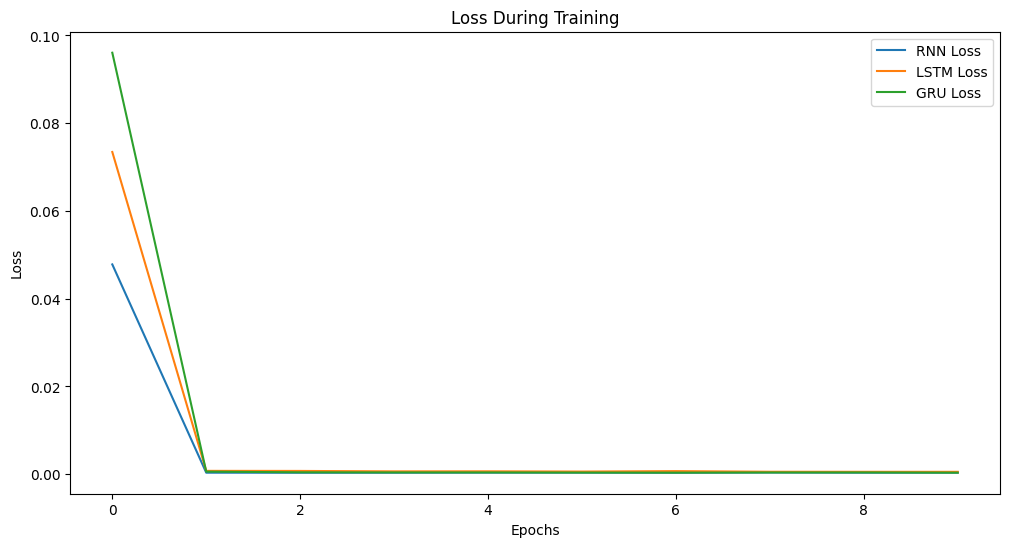

22/22 [==============================] - 0s 3ms/step


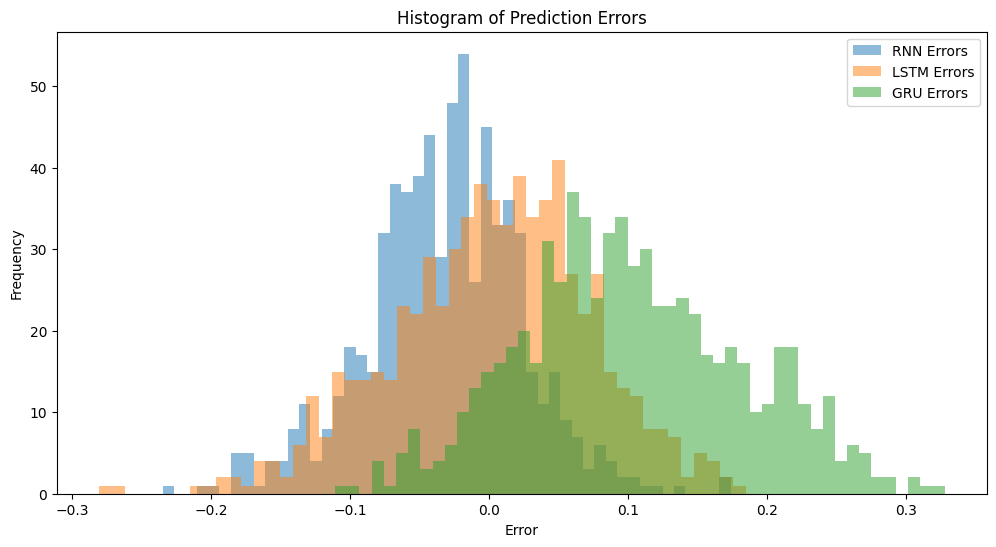

22/22 [==============================] - 0s 3ms/step


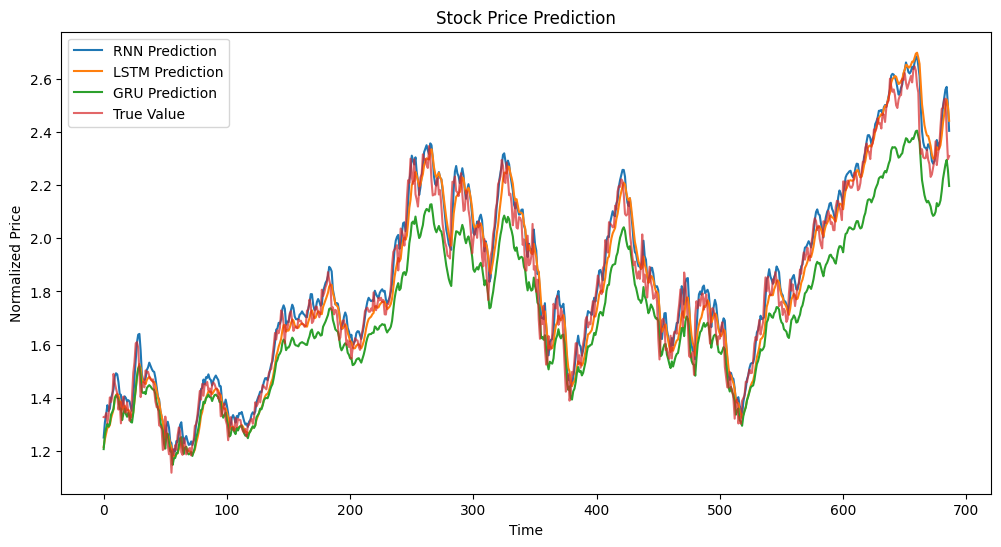

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.utils import check_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Función para descargar datos
def fetch_data(ticker_symbol, start_date, end_date):
    return yf.download(ticker_symbol, start=start_date, end=end_date)['Adj Close']

# Función para normalizar datos
def normalize_data(data):
    mean = data.mean()
    std = data.std()
    return (data - mean) / std

# Función para crear secuencias de datos
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Función para dividir datos en conjuntos de entrenamiento y prueba
def split_data(X, y, train_split):
    train_size = int(train_split * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    return X_train, X_test, y_train, y_test

# Función para crear y compilar modelos
def build_model(model_type, seq_length, num_units):
    model = Sequential()
    if model_type == 'RNN':
        model.add(SimpleRNN(num_units, activation='relu', input_shape=(seq_length, 1)))
    elif model_type == 'LSTM':
        model.add(LSTM(num_units, activation='relu', input_shape=(seq_length, 1)))
    elif model_type == 'GRU':
        model.add(GRU(num_units, activation='relu', input_shape=(seq_length, 1)))
    else:
        raise ValueError("Model type must be 'RNN', 'LSTM', or 'GRU'")
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Función para entrenar y evaluar un modelo
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, num_epochs, batch_size):
    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=1)
    predictions = model.predict(X_test)
    loss = model.evaluate(X_test, y_test, verbose=0)

    # Calcular métricas
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

    return history.history['loss'], loss, mae, rmse, r2, mape

# Función para graficar pérdidas durante el entrenamiento
def plot_training_loss(losses, model_names):
    plt.figure(figsize=(12, 6))
    for i, model_name in enumerate(model_names):
        plt.plot(losses[i], label=f'{model_name} Loss')
    plt.title('Loss During Training')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Función para graficar histograma de errores de predicción
def plot_error_histogram(models, model_names, X_test, y_test):
    plt.figure(figsize=(12, 6))
    for i, model_name in enumerate(model_names):
        errors = y_test - models[i].predict(X_test).flatten()
        plt.hist(errors, bins=50, alpha=0.5, label=f'{model_name} Errors')
    plt.title('Histogram of Prediction Errors')
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Función para graficar resultados
def plot_results(models, model_names, X_test, y_test):
    plt.figure(figsize=(12, 6))
    for i, model in enumerate(models):
        predictions = model.predict(X_test)
        plt.plot(predictions, label=f'{model_names[i]} Prediction')
    plt.plot(y_test, label='True Value', alpha=0.7)
    plt.legend()
    plt.title(f'Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Normalized Price')
    plt.show()

# Parámetros configurables
ticker_symbol = 'AAPL'
start_date = '2010-01-01'
end_date = '2023-09-10'
seq_length = 10
num_units = 50
num_epochs = 10
batch_size = 32

# Descargar y normalizar datos
closing_prices = fetch_data(ticker_symbol, start_date, end_date)
normalized_prices = normalize_data(closing_prices)

# Crear secuencias y dividir datos
X, y = create_sequences(normalized_prices, seq_length)
X_train, X_test, y_train, y_test = split_data(X, y, 0.8)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Crear modelos
model_types = ['RNN', 'LSTM', 'GRU']
models = [build_model(model_type, seq_length, num_units) for model_type in model_types]

# Entrenar y evaluar modelos
losses = []
test_losses = []
mae_values = []
rmse_values = []
r2_values = []
mape_values = []

for i, model in enumerate(models):
    loss, test_loss, mae, rmse, r2, mape = train_and_evaluate_model(model, X_train, y_train, X_test, y_test, num_epochs, batch_size)
    losses.append(loss)
    test_losses.append(test_loss)
    mae_values.append(mae)
    rmse_values.append(rmse)
    r2_values.append(r2)
    mape_values.append(mape)

    # Imprimir métricas
    print(f'{model_types[i]} Metrics:')
    print(f'MAE: {mae:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'R^2: {r2:.4f}')
    print(f'MAPE: {mape:.4f}%')
    print(f'Test Loss: {test_loss:.4f}')
    print('-' * 40)

# Visualizar pérdidas durante el entrenamiento
plot_training_loss(losses, model_types)

# Visualizar histograma de errores de predicción
plot_error_histogram(models, model_types, X_test, y_test)

# Visualizar resultados
plot_results(models, model_types, X_test, y_test)